In [1]:
from numpy import* 
from sympy import*
from math import*
import matplotlib.pyplot as plt
import csv

initial mass =  10.11 g
dQ =  0.002740462003280592 J
A =  0.000689586699208846 m^2
Mn =  2.159437362334293 g
dM =  8.214814158514963e-06 g
Rn =  0.007407804393661858 m
sum of dM =  7.950562637665744 g
time =  5538.000000074594 s
n =  523300
kc =  10.732271522053143 W/m^2*K
10.110000000000037
Ra =  6691.343000517747


/Users/brynleemeyer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


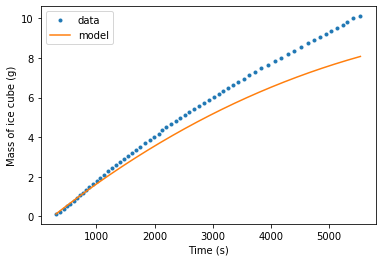

In [2]:
Hfus = 333.6 #enthalpy of fusion (J/g)
kc = 8.421702024856096 #convection coefficient between ice surface and air (W/m^2*K)

#used a calculator to find kc, and there was a dependency on radius. 
#kc could be incorrect and the online calculator was factoring in the Area of the actual heat transfer eqn. 

Cp_ice = 2.2087 #average specific heat capacity of ice (J/g*K)

rho = 916800 #density of water @ 0°C (g/m^3)
eps = 0.975 #emissivity coefficient of water
sig = 5.67e-8  # Stefan-Boltzmann W/m^2/K^4

Rn = 0.01353 #radius of ice cube (m)
Vn = (4/3)*pi*Rn**3
Mn = 10.11 #initial mass of water (g)
A = 4*pi*Rn**2

#Radius and density does not match up with the mass and volume; some of these might be off. 

Tamb = 25 + 273.15 #ambient temperature (K)
Tice = 0 + 273.15 #temperature of ice


D = 2*Rn
rho_air = 1.1 # air density in kg/m^3
myu = 0.0000187 # air viscosity in N*s/m^2
Tfilm = (Tamb + Tice)/2 # ambient temperature in °C
beta = 1/Tfilm # fluid thermal expansion coefficient in K^-1
k = 0.027 #thermal conductivity of air in J/s*m*K

#f = open('T2 model results', 'a', newline='')    
#writer = csv.writer(f, delimiter=',')
#writer.writerow(['Time(s)', 'Mass(g)'])
#writer.writerow([0, 14])

tn = 305 #start time
n = 0
M = [Mn]
m = []
t = [tn]
R = [Rn]
h = [kc]

Mw = 0.13
M_w = [Mw]
Q = []
dt = 0.01 #time step (s) 

print('initial mass = ', Mn, 'g')

while tn <= 5538:

    dQr = eps*sig*A*(Tamb**4 - Tice**4)*dt #radiative heat transfer
    dQc = kc*A*(Tamb-Tice)*dt #convective heat transfer
    dQ = dQr + dQc

    dM = dQ/Hfus #change in mass of the ice cube (mass of melted ice)
    
    Mn = Mn - dM #update mass and store value
    Mw = Mw + dM #mass of collected water droplets
    
    dV = dM/rho #convert dM to dV using density of ice
    Vn = Vn - dV #calculate new volume 
    
    Rn = (3*Vn/(4*pi))**(1/3) #calculate the new radius from the new volume
    A = 4*pi*(Rn)**2 #update area with new radius value
    
    # convection coefficient calculation/estimation 
    Gr = (((2*Rn)**3)*(rho_air**2)*9.81*(Tamb - Tice)*beta)/(myu**2)
    Pr = 0.6925925925925926 
    Ra = Gr*Pr
    Nu = 2 + 0.43*Ra**0.25
    kc = Nu*k/(2*Rn) # update coefficient of convection

    tn = tn + dt
    n = n + 1
    
    M.append(Mn)
    m.append(dM)
    t.append(tn)
    Q.append(dQ)
    R.append(Rn)
    M_w.append(Mw)
    h.append(kc)
    if n % 100 == 0:  # plot only every 100th point to csv file 
        #writer.writerow([tn, Mn])
        continue
    else: 
        continue
        
    if Mn <= 0:
        break
    else:
        continue
       
print('dQ = ', dQ, 'J')   
print('A = ', A, 'm^2')
print('Mn = ', Mn, 'g')
print('dM = ', dM, 'g')
print('Rn = ', Rn, 'm')
print('sum of dM = ', sum(m), 'g')
print('time = ', tn, 's')
print('n = ', n)
print('kc = ', kc, 'W/m^2*K')
print(sum(m) + Mn)
print('Ra = ', Ra)

file = '10mL Sphere - Ladle.csv'
data = genfromtxt(file, delimiter = ',')
xdata = data[:,0]
ydata = data[:,1]
plt.figure
plt.plot(xdata,ydata,".", label="data")
plt.xlabel("t(s)")


plt.figure
plt.plot(t, M_w, label = "model")
plt.xlabel("Time (s)")
plt.ylabel("Mass of ice cube (g)")
plt.legend()

